# HOUSING PRICE PREDICTION USING ADVANCED REGRESSION

**Problem Statement**
- To build a regression model for Surprise Housing, a US-based housing company which wants to enter the the Australian market. The company intends to use data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For this, they have collected data from the sale of houses in Australia.

**Business Goal**
- To model the price of houses with the available independent variables, which will be used by management to understand how the prices vary with the variables and accordingly they can manipulate the strategy of the firm and concentrate on areas that will yield high returns.
    
**Analytical Goals**
    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.
    3. Use Regularization and also determine the optimal value of lambda for ridge and lasso regression.

## Step 1: Data Loading

In [1]:
#Importing the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from datetime import date
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
houses_df = pd.read_csv("train.csv")
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Data Understanding and Inspection

In [3]:
print('Total numbers of rows in dataset are: ', houses_df.shape[0])
print('Total numbers of features in dataset are: ', houses_df.shape[1])

Total numbers of rows in dataset are:  1460
Total numbers of features in dataset are:  81


In [4]:
print("The column names are:\n", houses_df.columns.tolist())

The column names are:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch

In [5]:
print(houses_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
houses_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Step 3: Data Cleaning

In [8]:
# Columns having more than 40% missing values
is_Null = (houses_df.isnull().sum()/len(houses_df))*100 > 40
col_nulls = is_Null[is_Null.values==True].index.tolist()
print(col_nulls)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
missing_col_df = houses_df[col_nulls]
print(missing_col_df.isnull().sum()/len(missing_col_df)*100)

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [10]:
# Dropping columns having more than 40% missing values
houses_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [11]:
# Id and MSSubClass seems insignificant. Thus, dropping them. 
houses_df.drop(['Id', 'MSSubClass'], axis=1, inplace=True)

In [12]:
# Converting year columns to number of years from now:-
houses_df[['NoYearBuilt', 'NoYearRemodAdd', 'NoYrSold', 'NoGarageYrBlt']] = houses_df[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']].apply(lambda d: date.today().year - d)
houses_df['NoMoSold'] = houses_df['MoSold'].apply(lambda d: date.today().month - d)
houses_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt', 'MoSold'], axis=1, inplace=True)

In [13]:
#Categorical columns
cat_cols = houses_df.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
# Checking whether categorical columns are dominated by any one value
for i in cat_cols:
    print(houses_df[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [15]:
# Dropping columns dominated by one value since it won't add any extra information to our model
houses_df.drop(['Street', 'LandContour', 'LandSlope', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Functional', 'CentralAir', 'Electrical', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'], axis=1, inplace=True)

In [16]:
# Checking shape of dataset after chnages
houses_df.shape

(1460, 57)

In [17]:
#Categorical columns
cat_cols = houses_df.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish', 'SaleCondition'],
      dtype='object')

In [18]:
# Numeric columns
num_cols = houses_df.select_dtypes(exclude='object').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'NoYearBuilt', 'NoYearRemodAdd', 'NoYrSold',
       'NoGarageYrBlt', 'NoMoSold'],
      dtype='object')

In [19]:
# Removing outliers for numeric columns if any  
Q1 = houses_df[num_cols].quantile(0.05)
Q3 = houses_df[num_cols].quantile(0.95)
IQR = Q3 - Q1
houses_df = houses_df[~((houses_df[num_cols] < (Q1 - 1.5 * IQR)) |(houses_df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Step 4: Exploratory Data Analysis

### 1. Univariate Analysis

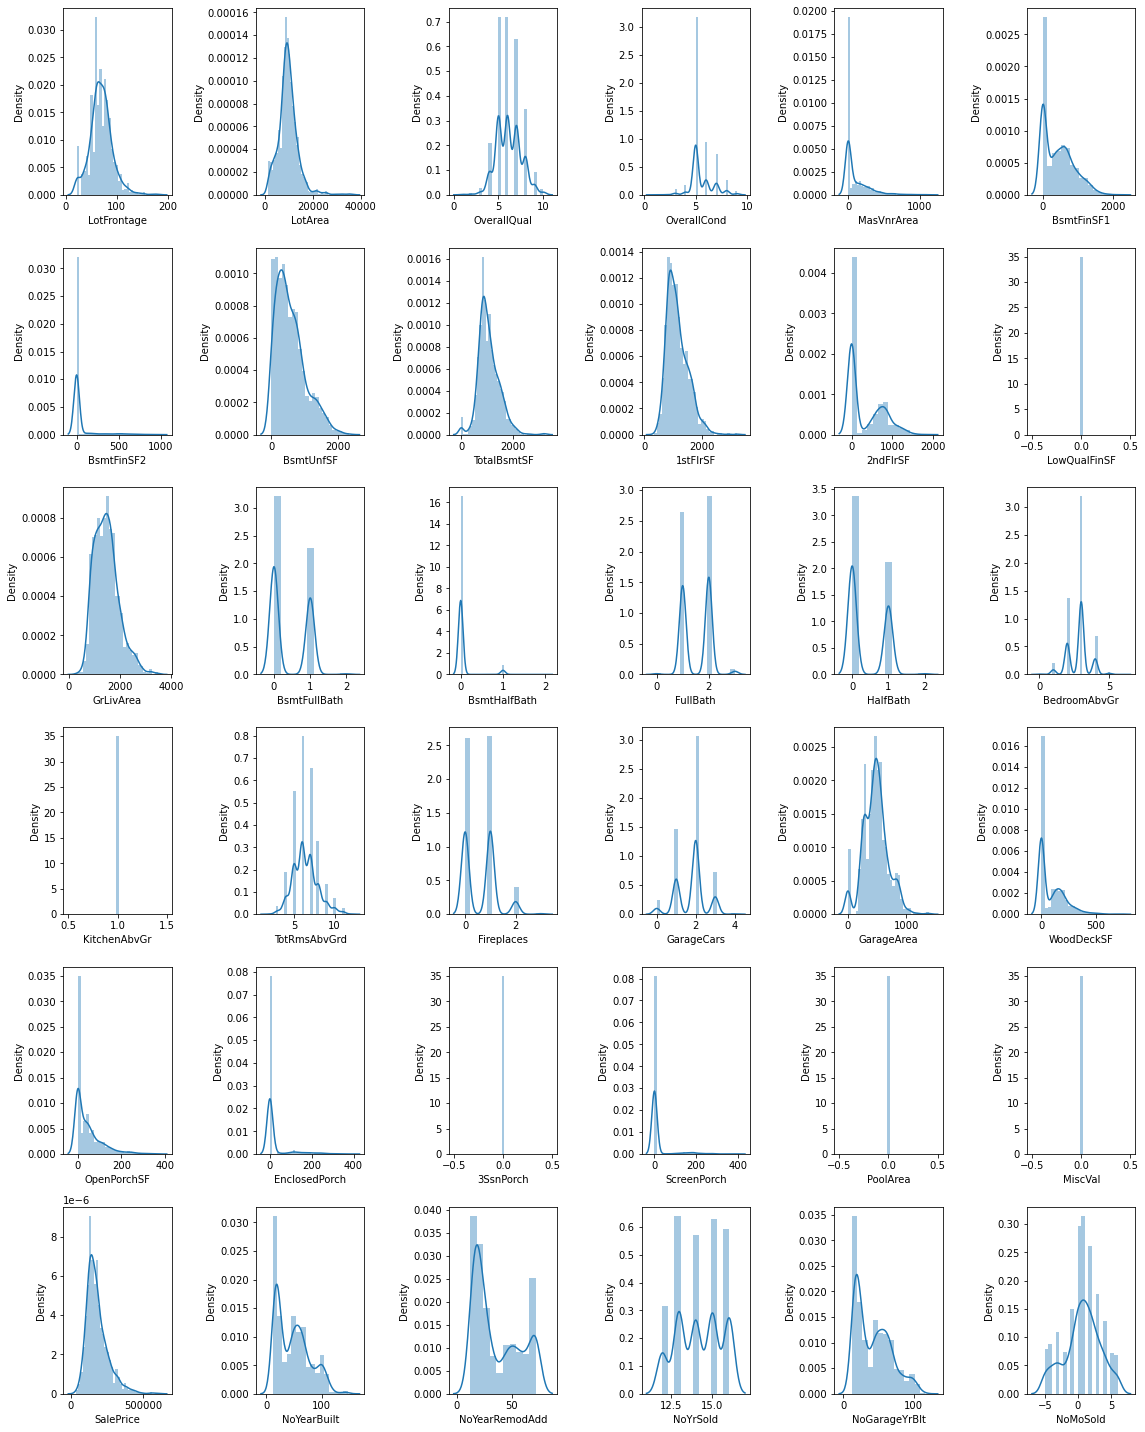

In [20]:
# Identification of distribution for quantitative variables (Univariate Analysis)


ncols = len(num_cols)
fig, axes = plt.subplots(6, 6, figsize=(16, 20))

for name, ax in zip(num_cols, axes.flatten()):
    sns.distplot(houses_df[name], ax=ax)
    
plt.tight_layout()

In [21]:
# Dropping following features due to no variance
houses_df.drop(['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

### 2. Bivariate Analysis (Categorical variables vs Target variable)

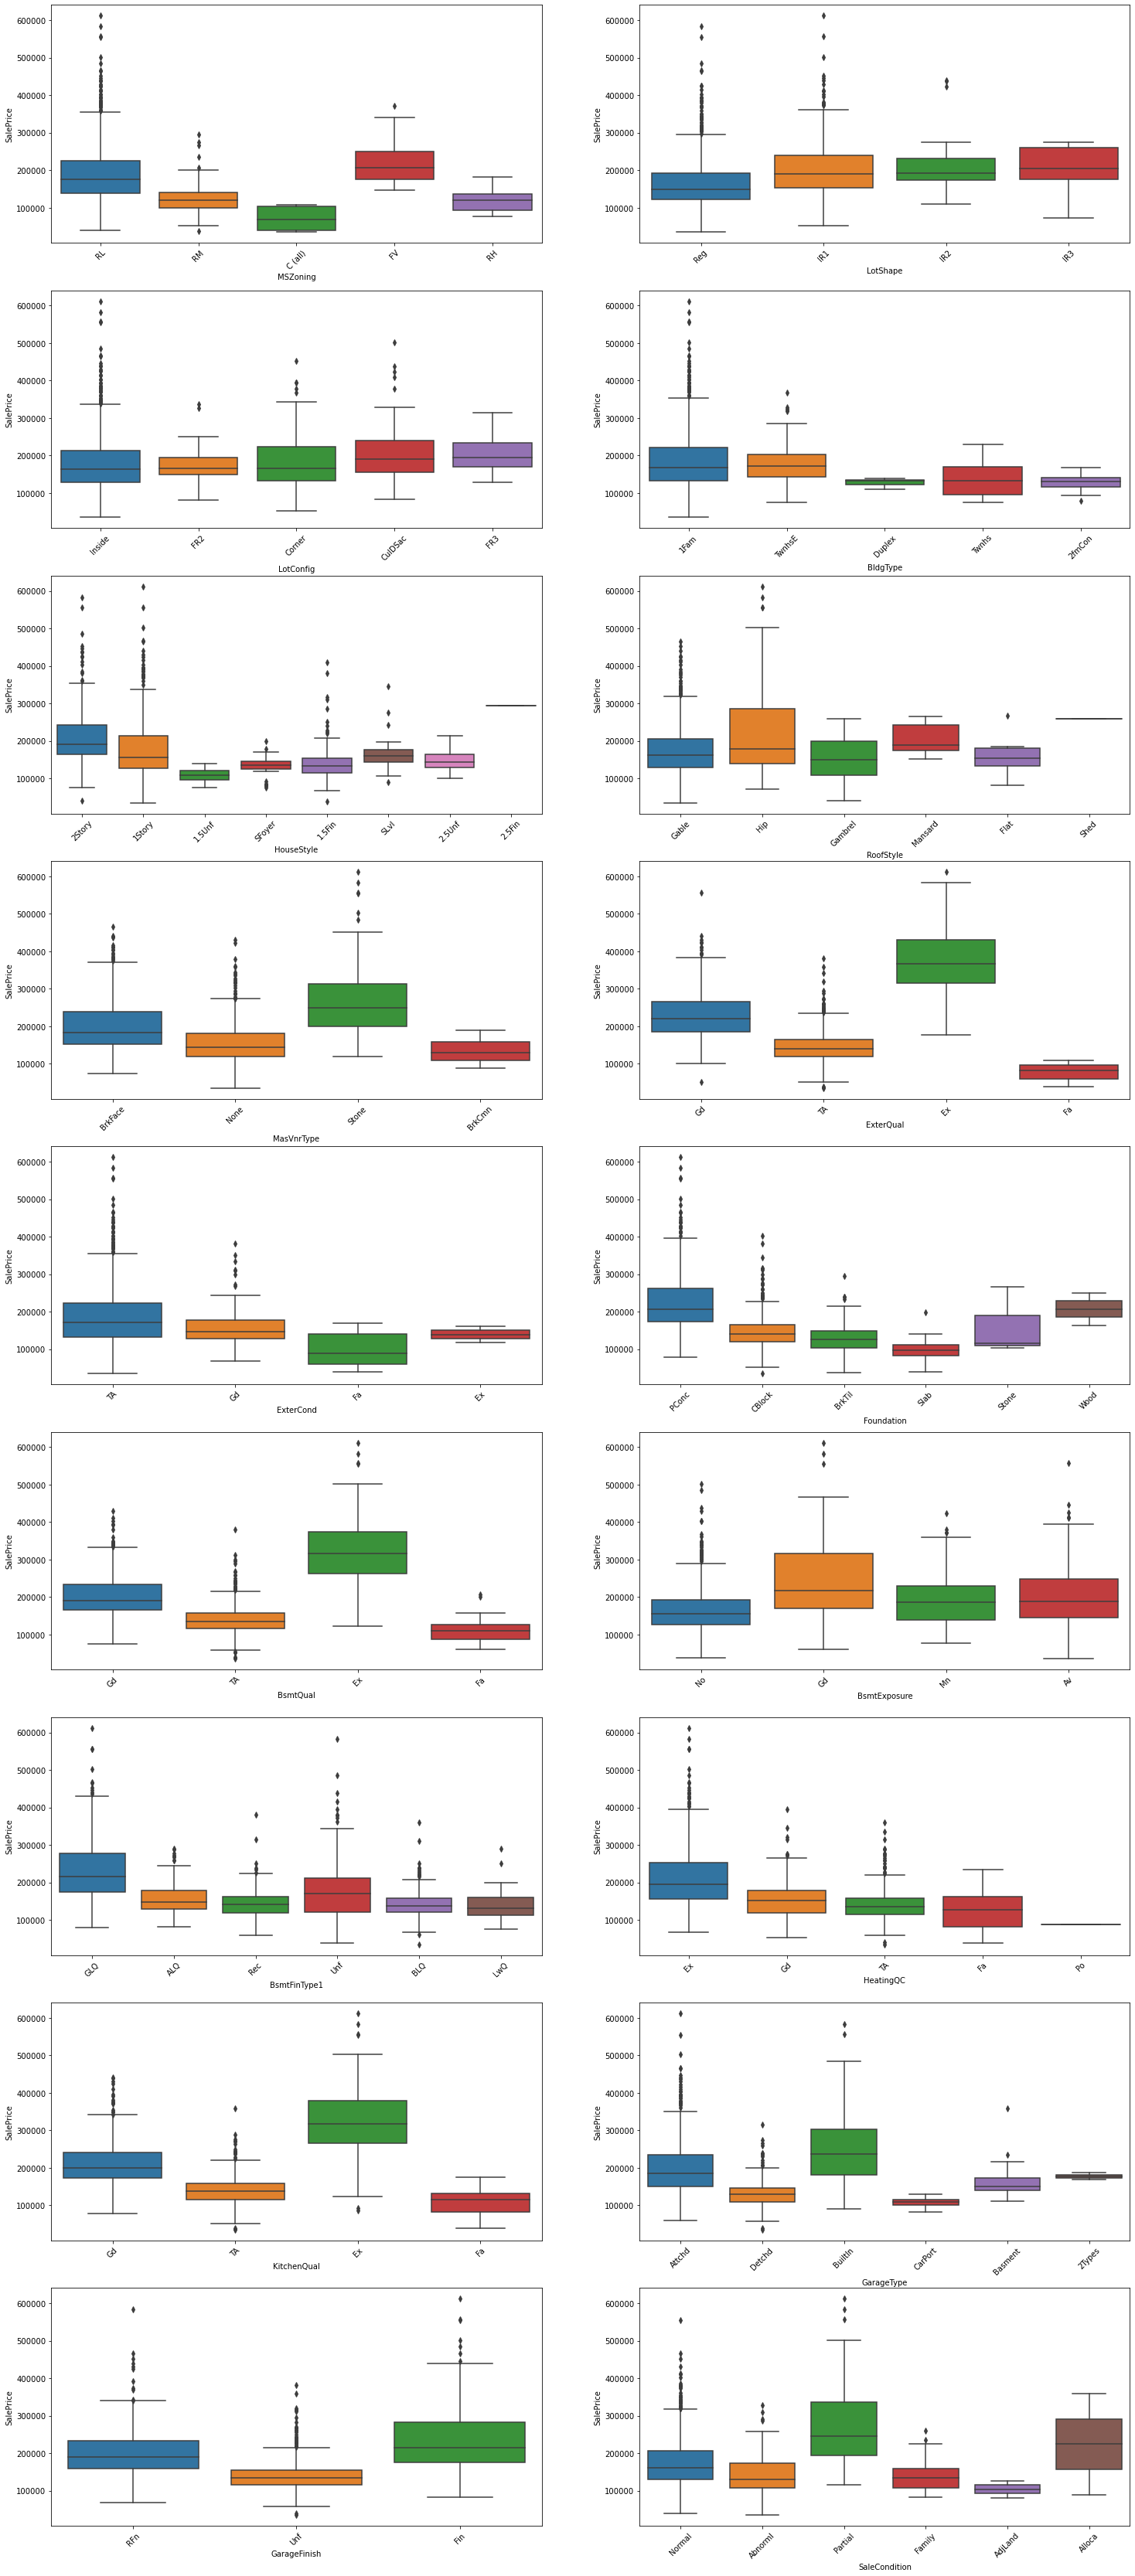

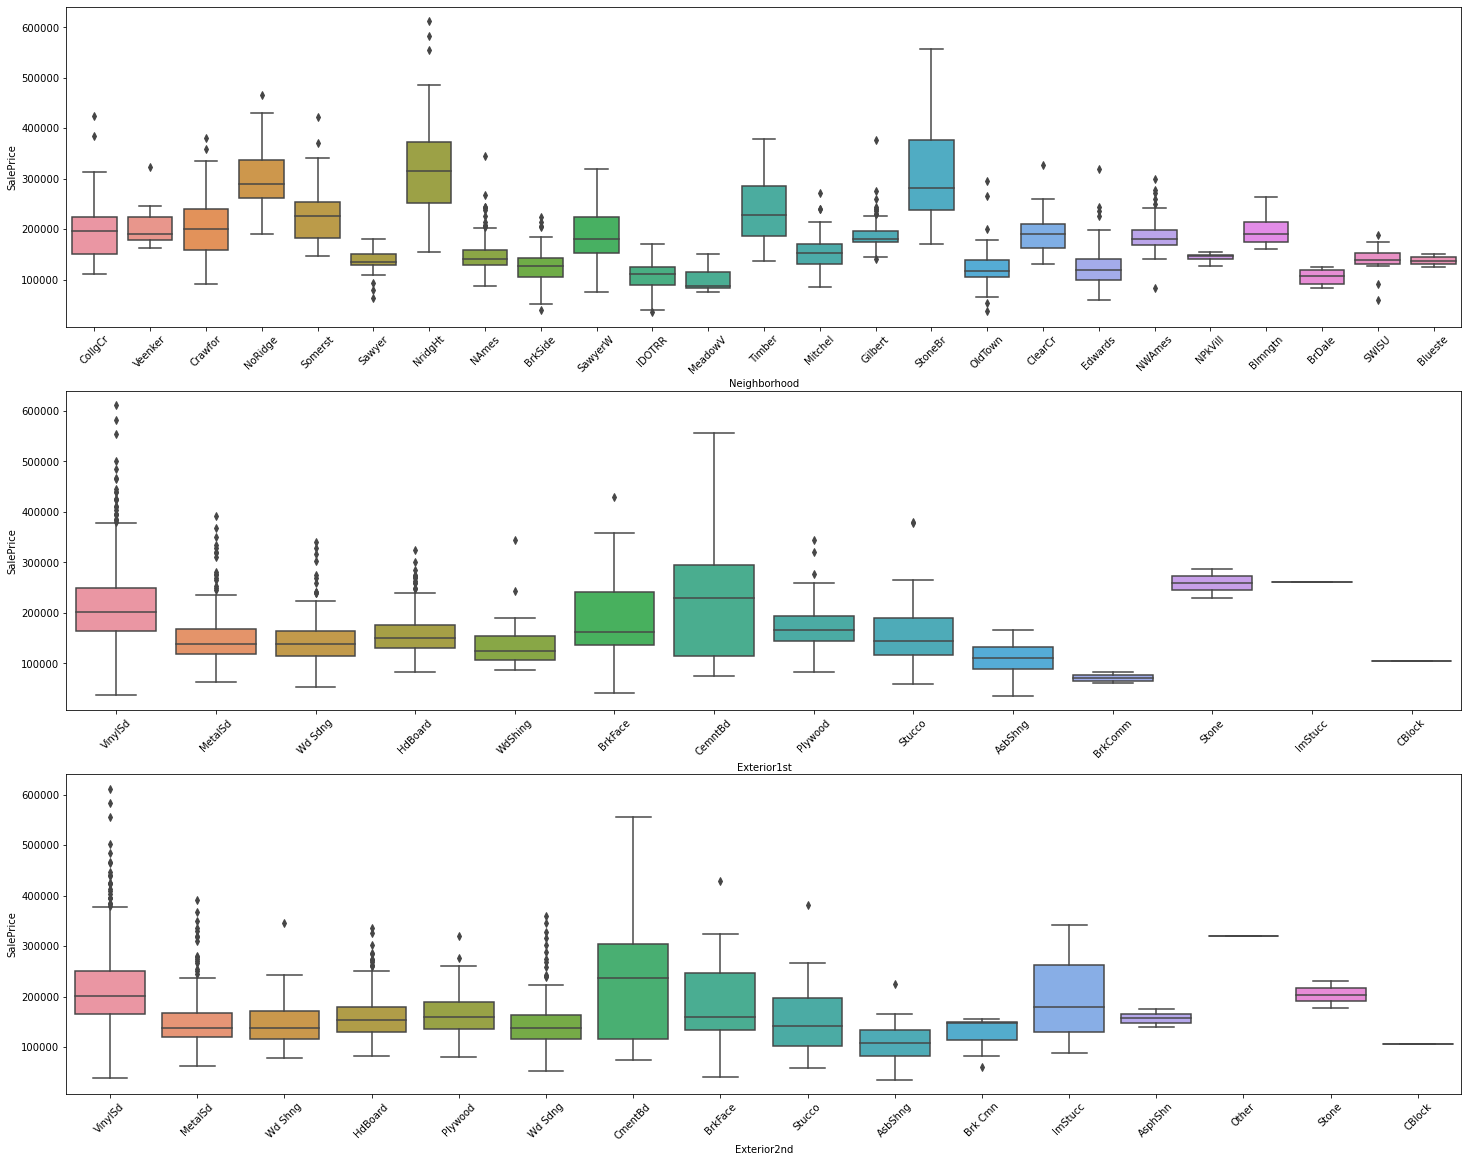

In [22]:
# Analysing/visualizing the categorical columns (bivariate analysis)
# to see how predictor variable stands against the target variable
cat_cols2 = ['Neighborhood', 'Exterior1st','Exterior2nd']
cat_cols1 = ['MSZoning', 'LotShape', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 
             'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 
             'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']
plt.figure(figsize=(25, 60))
for i in range(len(cat_cols1)):
    plt.subplot(9,2,i+1)
    sns.boxplot(x = cat_cols1[i], y = 'SalePrice', data = houses_df)
    plt.xticks(rotation=45)
plt.show()    
plt.figure(figsize=(25, 20))
for j in range(len(cat_cols2)):
    plt.subplot(3,1,j+1)
    sns.boxplot(x = cat_cols2[j], y = 'SalePrice', data = houses_df)
    plt.xticks(rotation=45)   
plt.show()

### 3. Bivariate Analysis (Continuous variables vs Target variable)

In [23]:
# Numeric columns
num_cols = houses_df.select_dtypes(exclude='object').columns.tolist()
num_cols.remove('SalePrice')
# num_cols

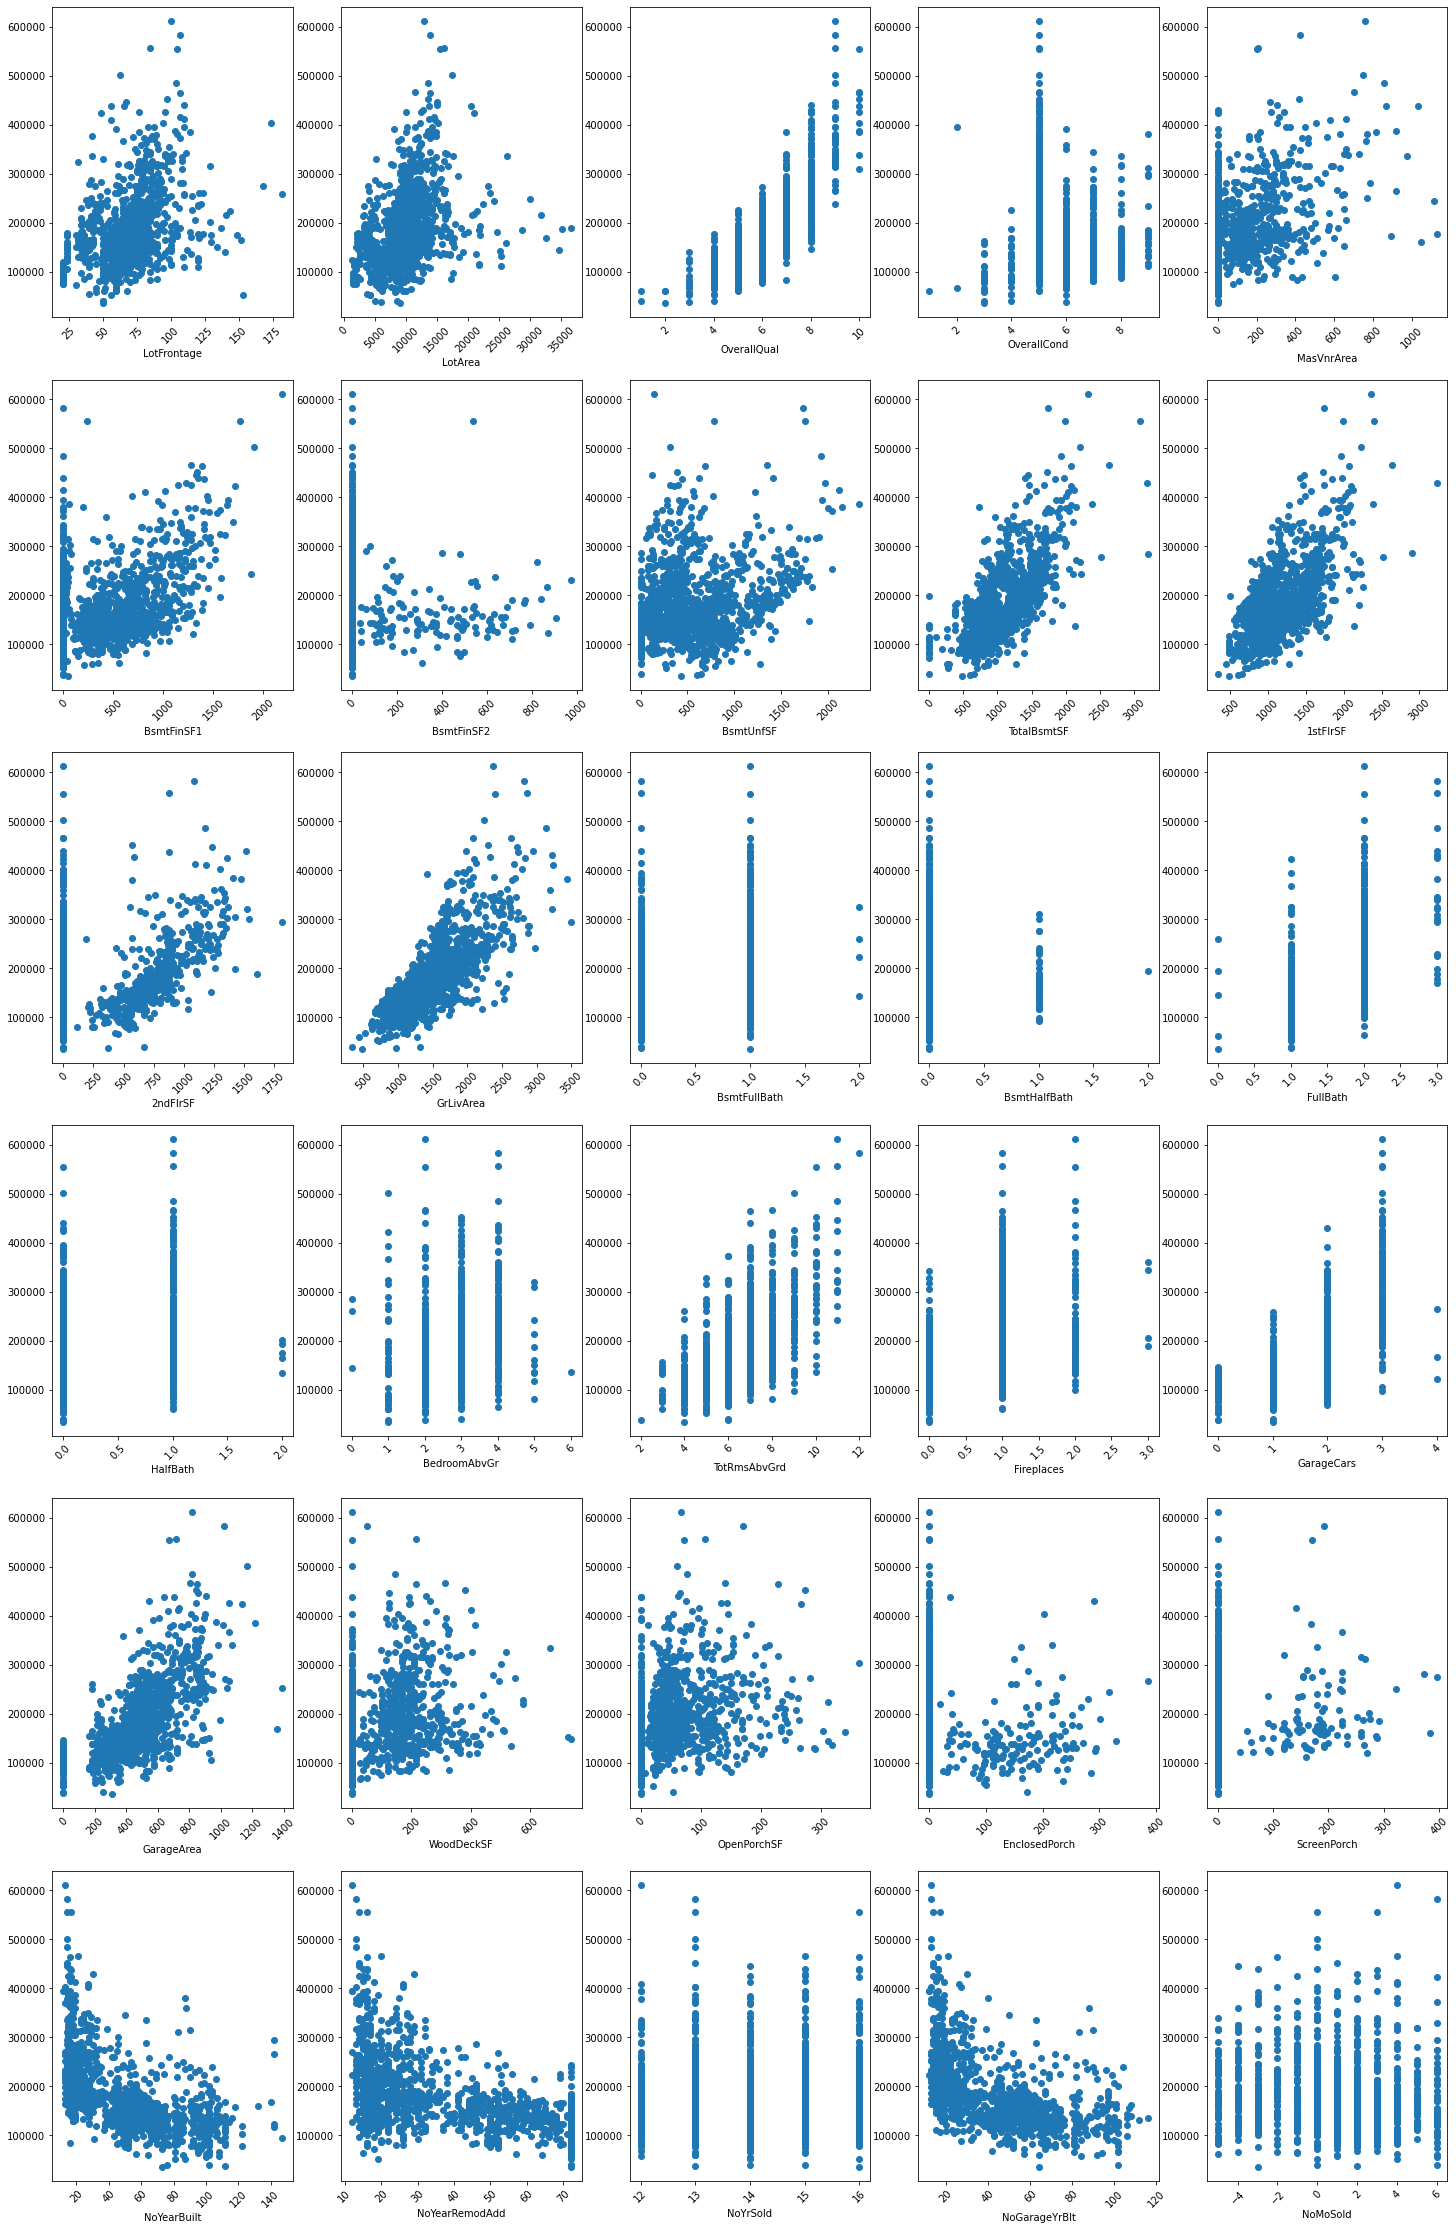

In [24]:
# Analysing/visualizing the numerical columns (bivariate analysis)
# to see how predictor variable stands against the target variable

plt.figure(figsize=(25, 40))
for i in range(len(num_cols)):
    plt.subplot(6,5,i+1)
    plt.scatter(x = num_cols[i], y = 'SalePrice', data = houses_df)
    plt.xlabel(num_cols[i])
    plt.xticks(rotation=45)
plt.show()

### 4. Multivariate Analysis 

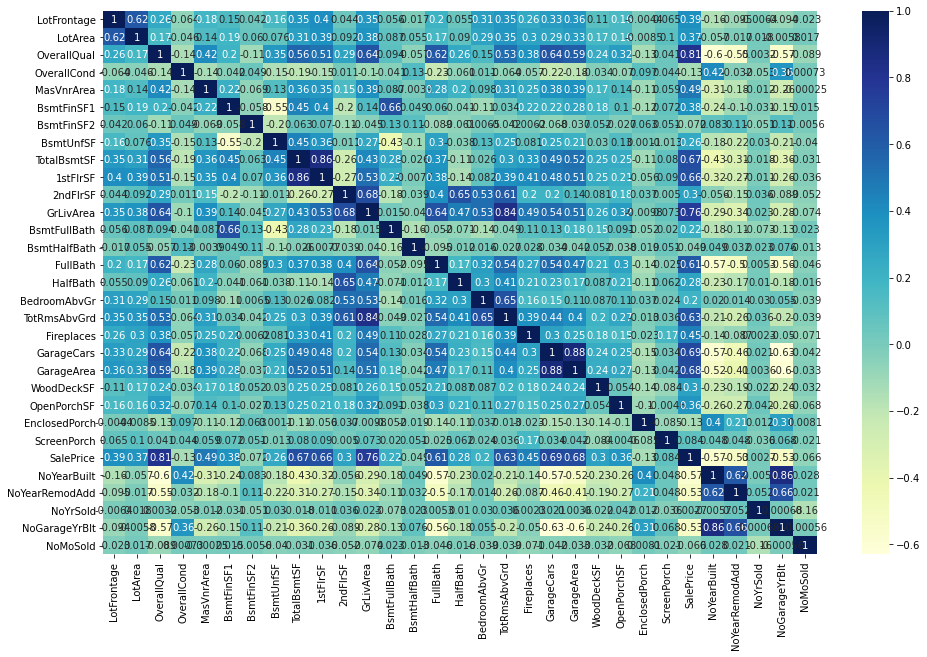

In [25]:
# Checking the correlations (multivariate analysis)

plt.figure(figsize = (16, 10))
sns.heatmap(houses_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [26]:
# Dropping following columns to avoid multicollinearity
houses_df.drop(['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageCars', 'NoYearRemodAdd', 'NoGarageYrBlt'], axis=1, inplace=True)

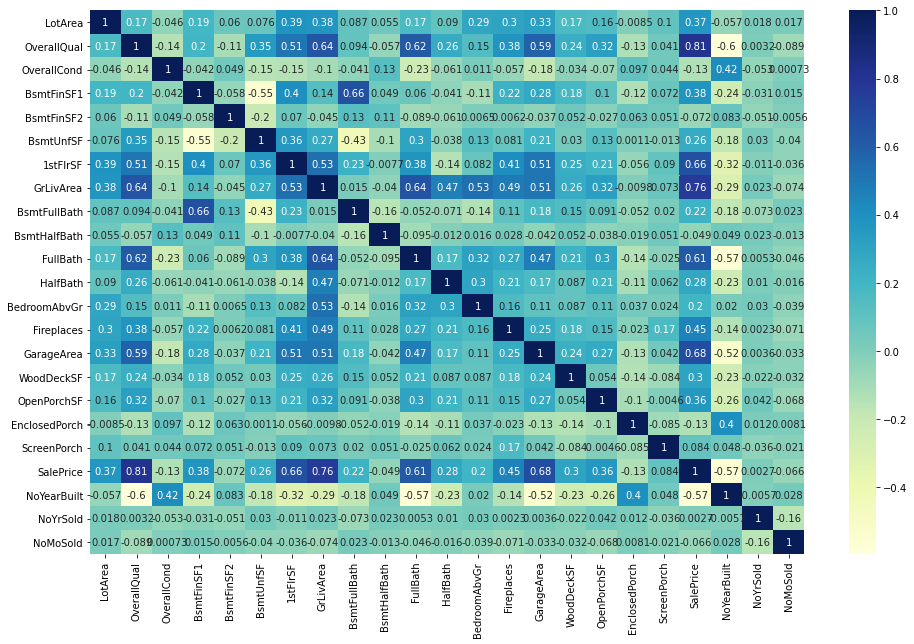

In [27]:
plt.figure(figsize = (16, 10))
sns.heatmap(houses_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [28]:
print(houses_df.shape)

(1266, 44)


## Step 5: Data Preparation - Dummy Variables Creation

In [29]:
houses_df = pd.get_dummies(houses_df,drop_first=True)
houses_df.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,706,0,150,856,1710,1,0,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,8,978,0,284,1262,1262,0,1,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,5,486,0,434,920,1786,1,0,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,5,216,0,540,961,1717,1,0,...,0,0,1,0,1,0,0,0,0,0
4,14260,8,5,655,0,490,1145,2198,1,0,...,0,0,0,1,0,0,0,0,1,0


## Step 6: Splitting the Data into Train and Test Sets

In [30]:
y = houses_df['SalePrice']
X = houses_df.drop('SalePrice', axis=1)

In [31]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

## Step 7: Missing Value Imputation Check

In [32]:
# Columns having more than 50% missing values
is_Null = (X_train.isnull().sum()/len(X_train))*100 > 0
col_nulls = is_Null[is_Null.values==True].index.tolist()
print(col_nulls)

[]


In [33]:
# Columns having more than 50% missing values
is_Null = (X_test.isnull().sum()/len(X_test))*100 > 0
col_nulls = is_Null[is_Null.values==True].index.tolist()
print(col_nulls)

[]


Since, there are no missing values, so need of imputation.

## Step 8: Scaling Train and Test set 

In [34]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

In [35]:
scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [36]:
X_train.shape

(848, 145)

In [37]:
X_test.shape

(418, 145)

## Step 9: Data Modelling

In [38]:
# Common function for building model and getting summary

def build_model(df):
    # Add a constant
    X_train_lm = sm.add_constant(df)

    # Create a first fitted model
    lr = sm.OLS(y_train.values, X_train_lm).fit()

    # Print a summary of the linear regression model obtained
    print(lr.summary())

### Initial Model with all columns -> Model-1

In [39]:
build_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     79.57
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:09:57   Log-Likelihood:                -9550.1
No. Observations:                 848   AIC:                         1.938e+04
Df Residuals:                     708   BIC:                         2.004e+04
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.416e+

### Model-2

In [40]:
# Running RFE (Recursive Feature Elimination) with the output number of the variable equal to 100

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 100) # running RFE
rfe = rfe.fit(X_train, y_train)

# Columns present for further modelling process
col = X_train.columns[rfe.support_]

# Creating new dataframe with RFE selected variables
X_train_2 = X_train[col]

build_model(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     120.0
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:09:57   Log-Likelihood:                -9562.2
No. Observations:                 848   AIC:                         1.932e+04
Df Residuals:                     752   BIC:                         1.977e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.152e+

### Model-3

In [41]:
# Running RFE (Recursive Feature Elimination) with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50) # running RFE
rfe = rfe.fit(X_train, y_train)

# Columns present for further modelling process
col = X_train.columns[rfe.support_]

# Creating new dataframe with RFE selected variables
X_train_3 = X_train[col]

build_model(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:09:57   Log-Likelihood:                -9631.3
No. Observations:                 848   AIC:                         1.936e+04
Df Residuals:                     798   BIC:                         1.960e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.057e+

### Model-4

In [42]:
# Running RFE (Recursive Feature Elimination) with the output number of the variable equal to 25

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25) # running RFE
rfe = rfe.fit(X_train, y_train)

# Columns present for further modelling process
col = X_train.columns[rfe.support_]

# Creating new dataframe with RFE selected variables
X_train_4 = X_train[col]

build_model(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     290.2
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:09:58   Log-Likelihood:                -9772.9
No. Observations:                 848   AIC:                         1.960e+04
Df Residuals:                     822   BIC:                         1.972e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  2.62e+04 

### Final Model

The model-3 with 50 features gives pretty well Adj R-squared and there is less variance with initial model, i.e. model-1 with 145 features. Thus, using those features for final model as part of coarse tuning. 

In [43]:
cols = X_train_3.columns.tolist()
X_train = X_train[cols]
X_test = X_test[cols]

In [44]:
# Instantiating
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
# Printing the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

20569.870382392342
[ 30751.38350081  52889.06774282  44112.45020306  96942.30094768
  28605.09434691  72711.53826238 -28671.45371295 188445.57123147
 -20566.35729449  32883.65389427  14790.2732075  -60973.49468988
  25991.2606313   36755.3941623   23455.51401901  22847.95085375
  26517.71553208  14123.91594854  34600.43303111  24414.12489283
  14192.43308618  44171.76545835  13364.41455584 -20819.14747185
 -14506.96248755  48601.37966732  56119.49731961  49220.88185613
  44530.5237567   59244.10403438 -67113.05994075 -17826.36840034
 -17826.36840035  12350.92046037  13672.69424485  14223.02262666
 -22360.15205465 -25197.35358491   6642.00810962  30600.10337698
 -20306.55580259 -28771.69279966 -22466.1237577  -20338.76167831
  20094.7249835  -23594.16554409 -26488.50958841 -31055.668587
  34545.0567126   17122.46744754]


In [46]:
# Calculating some metrics such as R2 score, RSS and RMSE
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score (Train) - ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score (Test) - ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss (Train)", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss (Test) - ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse (Train) - ", mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse (Test) - ", mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

r2_score (Train) -  0.9271298681999487
r2_score (Test) -  0.9015323876820694
rss (Train) 363974537781.29285
rss (Test) -  223703564070.20193
rmse (Train) -  20717.510874078536
rmse (Test) -  23133.871068166893


## Step 10: Tuning Model with Regularization

### 1) Ridge Regression

In [47]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [49]:
#Fitting Ridge model for alpha = 0.0001
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 30750.89360142  52890.94129815  44112.16945947  96937.91038611
  28601.48502077  72706.36443997 -28664.53075961 188440.82167183
 -20563.50865775  32884.16710282  14789.80893698 -60973.14482279
  25983.066627    36746.6186859   23447.35637342  22839.95587253
  26518.00073373  14123.84599523  34600.73802376  24414.42994812
  14192.36573509  44171.66416557  13364.08052676 -20818.97749901
 -14506.98156145  48590.63719083  56107.18272088  49210.14855766
  44519.32872013  59228.62815021 -67104.6604388  -17824.98505853
 -17824.98505834  12351.13687508  13672.87143981  14223.03282625
 -22360.13478057 -25197.58745431   6640.50095949  30596.16953699
 -20305.96648796 -28771.31095519 -22465.63407426 -20338.37210852
  20094.60984911 -23594.19525677 -26488.63302333 -31055.90161357
  34543.03735552  17122.64259308]


In [50]:
# Calculating some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score (Train) - ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score (Test) - ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss (Train)", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss (Test) - ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse (Train) - ", mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse (Test) - ", mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

r2_score (Train) -  0.9271298680621465
r2_score (Test) -  0.9015341521693286
rss (Train) 363974538469.5928
rss (Test) -  223699555421.2732
rmse (Train) -  20717.510893667626
rmse (Test) -  23133.663793903503


### 2) Lasso Regression

In [51]:
lasso = Lasso()

# Hyperparameter Tuning
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [53]:
#Fitting Lasso model for alpha = 50

alpha = 50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 23864.80910513,  61284.47524169,  42454.24901713,  80346.16021508,
        10736.35668413,  51565.12138469,      0.        , 174339.88308104,
        -7501.59370715,  34621.23204727,  10691.67592796, -57640.07594512,
            0.        ,   4529.58654682,     -0.        ,  -1009.32976255,
        26191.89393137,   4829.93310816,  33383.54022527,  24756.62529776,
        13616.74523581,  40379.01768878,   5142.87268421, -17582.10220379,
       -12394.4371176 ,      0.        ,      0.        ,   1015.94076918,
            0.        ,      0.        , -17777.1128892 ,     -0.        ,
           -0.        ,   3872.55247449,   5496.11957665,   4946.58330877,
       -19551.39032066, -23802.27513193,     -0.        ,   4858.44978308,
        -2693.33286969, -24205.01979689, -20137.87807351, -18174.48908371,
        19696.91810525, -20992.44772113, -26219.4461263 , -30974.4784057 ,
         5281.59880214,  18599.36455017])

In [54]:
# Calculating some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score (Train) - ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score (Test) - ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss (Train)", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss (Test) - ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse (Train) - ", mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse (Test) - ", mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

r2_score (Train) -  0.9231552354766756
r2_score (Test) -  0.9039919558214556
rss (Train) 383827186219.9327
rss (Test) -  218115796215.34952
rmse (Train) -  21275.018186696343
rmse (Test) -  22843.119859535476


## Step 11: Model Evaluation

In [55]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.271299e-01,9.271299e-01,9.231552e-01
1,R2 Score (Test),9.015324e-01,9.015342e-01,9.039920e-01
2,RSS (Train),3.639745e+11,3.639745e+11,3.838272e+11
3,RSS (Test),2.237036e+11,2.236996e+11,2.181158e+11
4,RMSE (Train),2.071751e+04,2.071751e+04,2.127502e+04
5,RMSE (Test),2.313387e+04,2.313366e+04,2.284312e+04


In [56]:
ridge_pred = ridge.predict(X_test)

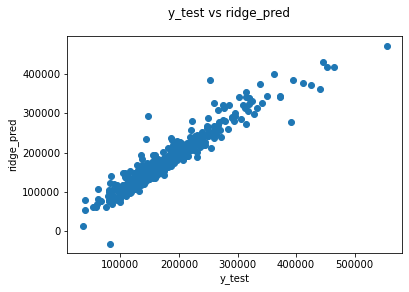

In [57]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure()
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred')          # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('ridge_pred')  
plt.show()

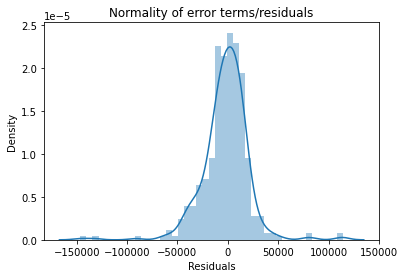

In [58]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [59]:
lasso_pred = lasso.predict(X_test)

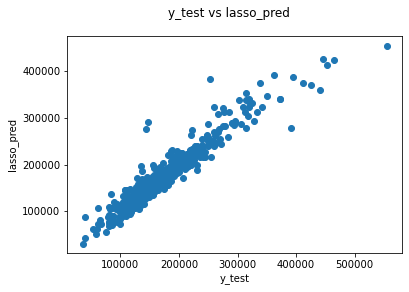

In [60]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure()
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred')          # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('lasso_pred')  
plt.show()

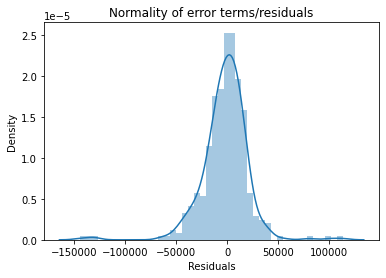

In [61]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Step 12: Observing the changes in the coefficients after regularization

In [62]:
betas = pd.DataFrame(index=X_train.columns)

In [63]:
betas.rows = X_train.columns

In [64]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [65]:
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotArea,30750.893601,23864.809105
OverallQual,52890.941298,61284.475242
OverallCond,44112.169459,42454.249017
BsmtFinSF1,96937.910386,80346.160215
BsmtFinSF2,28601.485021,10736.356684
BsmtUnfSF,72706.364440,51565.121385
1stFlrSF,-28664.530760,0.000000
GrLivArea,188440.821672,174339.883081
BedroomAbvGr,-20563.508658,-7501.593707
GarageArea,32884.167103,34621.232047


### Observing features in Descending order of significance 

#### 1) Ridge Regression

In [66]:
betas['Ridge']= abs (betas['Ridge'])
betas.sort_values(by=['Ridge'], ascending=False)['Ridge']

GrLivArea                188440.821672
BsmtFinSF1                96937.910386
BsmtUnfSF                 72706.364440
Exterior1st_BrkComm       67104.660439
NoYearBuilt               60973.144823
RoofStyle_Shed            59228.628150
RoofStyle_Gambrel         56107.182721
OverallQual               52890.941298
RoofStyle_Hip             49210.148558
RoofStyle_Gable           48590.637191
RoofStyle_Mansard         44519.328720
Neighborhood_StoneBr      44171.664166
OverallCond               44112.169459
MSZoning_RH               36746.618686
Neighborhood_NoRidge      34600.738024
SaleCondition_Alloca      34543.037356
GarageArea                32884.167103
KitchenQual_TA            31055.901614
LotArea                   30750.893601
Foundation_Stone          30596.169537
BsmtQual_Fa               28771.310955
1stFlrSF                  28664.530760
BsmtFinSF2                28601.485021
Neighborhood_Crawfor      26518.000734
KitchenQual_Gd            26488.633023
MSZoning_FV              

In [67]:
betas.sort_values(by=['Ridge'], ascending=False)['Ridge'][:10]

GrLivArea              188440.821672
BsmtFinSF1              96937.910386
BsmtUnfSF               72706.364440
Exterior1st_BrkComm     67104.660439
NoYearBuilt             60973.144823
RoofStyle_Shed          59228.628150
RoofStyle_Gambrel       56107.182721
OverallQual             52890.941298
RoofStyle_Hip           49210.148558
RoofStyle_Gable         48590.637191
Name: Ridge, dtype: float64

**Inference:-**
>The top 10 features of ridge regression model are:-      
1. GrLivArea              
2. BsmtFinSF1             
3. BsmtUnfSF              
4. Exterior1st_BrkComm    
5. NoYearBuilt             
6. RoofStyle_Shed          
7. RoofStyle_Gambrel       
8. OverallQual             
9. RoofStyle_Hip           
10. RoofStyle_Gable

#### 2) Lasso Regression

In [68]:
betas['Lasso']= abs (betas['Lasso'])
betas.sort_values(by=['Lasso'], ascending=False)['Lasso']

GrLivArea                174339.883081
BsmtFinSF1                80346.160215
OverallQual               61284.475242
NoYearBuilt               57640.075945
BsmtUnfSF                 51565.121385
OverallCond               42454.249017
Neighborhood_StoneBr      40379.017689
GarageArea                34621.232047
Neighborhood_NoRidge      33383.540225
KitchenQual_TA            30974.478406
KitchenQual_Gd            26219.446126
Neighborhood_Crawfor      26191.893931
Neighborhood_NridgHt      24756.625298
BsmtQual_Fa               24205.019797
LotArea                   23864.809105
ExterQual_TA              23802.275132
KitchenQual_Fa            20992.447721
BsmtQual_Gd               20137.878074
BsmtExposure_Gd           19696.918105
ExterQual_Gd              19551.390321
SaleCondition_Partial     18599.364550
BsmtQual_TA               18174.489084
Exterior1st_BrkComm       17777.112889
BldgType_Twnhs            17582.102204
Neighborhood_Somerst      13616.745236
BldgType_TwnhsE          

In [69]:
betas.sort_values(by=['Lasso'], ascending=False)['Lasso'][:10]

GrLivArea               174339.883081
BsmtFinSF1               80346.160215
OverallQual              61284.475242
NoYearBuilt              57640.075945
BsmtUnfSF                51565.121385
OverallCond              42454.249017
Neighborhood_StoneBr     40379.017689
GarageArea               34621.232047
Neighborhood_NoRidge     33383.540225
KitchenQual_TA           30974.478406
Name: Lasso, dtype: float64

**Inference:-**
>The top 10 features of lasso regression model are:-
1. GrLivArea              
2. BsmtFinSF1             
3. OverallQual              
4. NoYearBuilt              
5. BsmtUnfSF               
6. OverallCond              
7. Neighborhood_StoneBr     
8. GarageArea               
9. Neighborhood_NoRidge     
10. KitchenQual_TA

# Problem Statement - Part 2

### Subjective Questions Implementation

### Question 1

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

=>


**a) The optimal value of alpha for ridge and lasso regression are -** 
- Ridge Regression => 0.0001
- Lasso Regression => 50

**b) After doubling the value of alpha for both ridge and lasso -** 

In [70]:
#Fitting Ridge model for alpha = 0.0002
alpha = 0.0002
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 30750.4039041   52892.8144184   44111.88858935  96933.5205956
  28597.87673525  72701.19165167 -28657.60911148 188436.07288349
 -20560.66046967  32884.68034272  14789.34492556 -60972.794861
  25974.87720381  36737.84785345  23439.20309739  22831.96521205
  26518.2858251   14123.77597082  34601.04296409  24414.73492498
  14192.29822685  44171.56284494  13363.74653773 -20818.8074945
 -14507.0005964   48579.89962306  56094.8738869   49199.42016999
  44508.13879419  59213.16005115 -67096.26304975 -17823.60196266
 -17823.60196264  12351.35300167  13673.04835431  14223.04281633
 -22360.11747959 -25197.82126423   6638.99411965  30592.23738111
 -20305.37708541 -28770.92919994 -22465.14447884 -20337.98262881
  20094.49478881 -23594.22496901 -26488.75644936 -31056.13460123
  34541.01818582  17122.81771575]


In [71]:
# Calculating some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score (Train) - ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score (Test) - ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss (Train)", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss (Test) - ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse (Train) - ", mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse (Test) - ", mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

r2_score (Train) -  0.9271298676489417
r2_score (Test) -  0.901535915285552
rss (Train) 363974540533.484
rss (Test) -  223695549887.131
rmse (Train) -  20717.5109524062
rmse (Test) -  23133.45667884064


In [72]:
#Fitting Lasso model for alpha = 100

alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 2.18691927e+04,  6.49629880e+04,  3.94676477e+04,  7.86985869e+04,
        6.64221499e+03,  4.75969652e+04,  0.00000000e+00,  1.70673530e+05,
       -5.54855331e+00,  3.66372925e+04,  8.63540344e+03, -5.25276831e+04,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.35753172e+03,
        2.41669590e+04,  0.00000000e+00,  3.09399135e+04,  2.35711886e+04,
        1.09866209e+04,  3.61445251e+04,  0.00000000e+00, -1.49303542e+04,
       -9.90761073e+03, -0.00000000e+00,  0.00000000e+00,  1.46612429e+03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.39931421e+03,  1.04872856e+03,
       -1.80173265e+04, -2.37330530e+04, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.12501352e+04, -1.90541281e+04, -1.72761808e+04,
        2.01276477e+04, -1.81917755e+04, -2.53310582e+04, -3.01541485e+04,
        0.00000000e+00,  1.97091816e+04])

In [73]:
# Calculating some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score (Train) - ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score (Test) - ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss (Train)", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss (Test) - ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse (Train) - ", mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse (Test) - ", mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

r2_score (Train) -  0.9206643678220473
r2_score (Test) -  0.9037927411995447
rss (Train) 396268667810.1588
rss (Test) -  218568381790.31482
rmse (Train) -  21617.075596002815
rmse (Test) -  22866.80706891692


In [74]:
# Creating a table which contain all the metrics

lr_table2 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric2 = pd.DataFrame(lr_table2 ,columns = ['Metric', 'Linear Regression'] )

rg_metric2 = pd.Series(metric2, name = 'Ridge Regression')
ls_metric2 = pd.Series(metric3, name = 'Lasso Regression')

final_metric2 = pd.concat([lr_metric2, rg_metric2, ls_metric2], axis = 1)

**i) Initially**

In [75]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.271299e-01,9.271299e-01,9.231552e-01
1,R2 Score (Test),9.015324e-01,9.015342e-01,9.039920e-01
2,RSS (Train),3.639745e+11,3.639745e+11,3.838272e+11
3,RSS (Test),2.237036e+11,2.236996e+11,2.181158e+11
4,RMSE (Train),2.071751e+04,2.071751e+04,2.127502e+04
5,RMSE (Test),2.313387e+04,2.313366e+04,2.284312e+04


**ii) After doubling the values of alpha** 

In [76]:
final_metric2

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.271299e-01,9.271299e-01,9.206644e-01
1,R2 Score (Test),9.015324e-01,9.015359e-01,9.037927e-01
2,RSS (Train),3.639745e+11,3.639745e+11,3.962687e+11
3,RSS (Test),2.237036e+11,2.236955e+11,2.185684e+11
4,RMSE (Train),2.071751e+04,2.071751e+04,2.161708e+04
5,RMSE (Test),2.313387e+04,2.313346e+04,2.286681e+04


**Inference:-** 
>After doubling the values of alpha, Ridge Regression is not affected as such, but the Lasso Regression has been affected a bit. The R2_score has reduced and the error metrics have increased by a small amount for Lasso Regression. 



**c) The most important predictor variables after the change is implemented are as follows -**

In [77]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

i) For Ridge Regression

In [78]:
betas['Ridge']= abs (betas['Ridge'])
betas.sort_values(by=['Ridge'], ascending=False)['Ridge']

GrLivArea                188436.072883
BsmtFinSF1                96933.520596
BsmtUnfSF                 72701.191652
Exterior1st_BrkComm       67096.263050
NoYearBuilt               60972.794861
RoofStyle_Shed            59213.160051
RoofStyle_Gambrel         56094.873887
OverallQual               52892.814418
RoofStyle_Hip             49199.420170
RoofStyle_Gable           48579.899623
RoofStyle_Mansard         44508.138794
Neighborhood_StoneBr      44171.562845
OverallCond               44111.888589
MSZoning_RH               36737.847853
Neighborhood_NoRidge      34601.042964
SaleCondition_Alloca      34541.018186
GarageArea                32884.680343
KitchenQual_TA            31056.134601
LotArea                   30750.403904
Foundation_Stone          30592.237381
BsmtQual_Fa               28770.929200
1stFlrSF                  28657.609111
BsmtFinSF2                28597.876735
Neighborhood_Crawfor      26518.285825
KitchenQual_Gd            26488.756449
MSZoning_FV              

In [79]:
betas.sort_values(by=['Ridge'], ascending=False)['Ridge'][:10]

GrLivArea              188436.072883
BsmtFinSF1              96933.520596
BsmtUnfSF               72701.191652
Exterior1st_BrkComm     67096.263050
NoYearBuilt             60972.794861
RoofStyle_Shed          59213.160051
RoofStyle_Gambrel       56094.873887
OverallQual             52892.814418
RoofStyle_Hip           49199.420170
RoofStyle_Gable         48579.899623
Name: Ridge, dtype: float64

**Inference:-**
> The top 10 features after the change for ridge regression are:-
1. GrLivArea     
2. BsmtFinSF1      
3. BsmtUnfSF                 
4. Exterior1st_BrkComm       
5. NoYearBuilt               
6. RoofStyle_Shed            
7. RoofStyle_Gambrel       
8. OverallQual         
9. RoofStyle_Hip      
10. RoofStyle_Gable      


ii) For Lasso Regression

In [80]:
betas['Lasso']= abs (betas['Lasso'])
betas.sort_values(by=['Lasso'], ascending=False)['Lasso']

GrLivArea                170673.529890
BsmtFinSF1                78698.586924
OverallQual               64962.987982
NoYearBuilt               52527.683082
BsmtUnfSF                 47596.965164
OverallCond               39467.647713
GarageArea                36637.292469
Neighborhood_StoneBr      36144.525102
Neighborhood_NoRidge      30939.913539
KitchenQual_TA            30154.148534
KitchenQual_Gd            25331.058154
Neighborhood_Crawfor      24166.958953
ExterQual_TA              23733.053041
Neighborhood_NridgHt      23571.188554
LotArea                   21869.192668
BsmtQual_Fa               21250.135243
BsmtExposure_Gd           20127.647672
SaleCondition_Partial     19709.181567
BsmtQual_Gd               19054.128103
KitchenQual_Fa            18191.775468
ExterQual_Gd              18017.326504
BsmtQual_TA               17276.180803
BldgType_Twnhs            14930.354228
Neighborhood_Somerst      10986.620919
BldgType_TwnhsE            9907.610731
ScreenPorch              

In [81]:
betas.sort_values(by=['Lasso'], ascending=False)['Lasso'][:10]

GrLivArea               170673.529890
BsmtFinSF1               78698.586924
OverallQual              64962.987982
NoYearBuilt              52527.683082
BsmtUnfSF                47596.965164
OverallCond              39467.647713
GarageArea               36637.292469
Neighborhood_StoneBr     36144.525102
Neighborhood_NoRidge     30939.913539
KitchenQual_TA           30154.148534
Name: Lasso, dtype: float64

**Inference:-**
> The top 10 features after the change for lasso regression are :-
1. GrLivArea               
2. BsmtFinSF1            
3. OverallQual            
4. NoYearBuilt               
5. BsmtUnfSF                
6. OverallCond              
7. GarageArea                
8. Neighborhood_StoneBr      
9. Neighborhood_NoRidge      
10. KitchenQual_TA


### Question 2

**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**

=> The r2_score of lasso regression is slightly higher than ridge regression for the test dataset. Also the error values are also slightly less. Apart from this, Lasso Regression helped in feature selection as well. Hence, we will choose lasso regression to solve this problem

### Question 3

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

=>

>The five most important predictor variables in the original lasso model are:-
1. GrLivArea
2. BsmtFinSF1
3. OverallQual
4. NoYearBuilt
5. BsmtUnfSF

In [82]:
# Dropping 5 most important predictor variables
X_train2 = X_train.drop(['GrLivArea','BsmtFinSF1','OverallQual','NoYearBuilt','BsmtUnfSF'],axis=1)
X_test2 = X_test.drop(['GrLivArea','BsmtFinSF1','OverallQual','NoYearBuilt','BsmtUnfSF'],axis=1)

In [83]:
# Lasso model excluding the five most important predictor variables
alpha = 50
lasso3 = Lasso(alpha=alpha)
lasso3.fit(X_train2, y_train)
lasso3.coef_

array([ 47558.56363134,  29794.41261895, -16193.20124395, 116284.54914915,
        98148.68107794, 100009.46099186,  15459.49085047,  19789.35779516,
         1026.44225228,      0.        ,  -1109.74341659,  37891.87794749,
        13327.85951001,  60890.36562668,  33020.39662851,   3458.75929318,
        64273.05781107,   9757.79310154,  -1836.38308865,  -5509.27333189,
        -1163.36512196,  10336.12867214,      0.        ,     -0.        ,
         8292.17059971, -15311.44806043,     -0.        ,     -0.        ,
         7484.0135634 ,   1562.06811109,   4552.60047872, -27961.20233026,
       -46222.14644714, -12103.32818352,     -0.        ,      0.        ,
       -51073.03731091, -15414.299048  , -31644.71700579,  27639.03799186,
       -55301.74366218, -41841.02311517, -55658.10351237,  18693.08331167,
        20107.81970901])

In [84]:
# Calculating some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso3.predict(X_train2)
y_pred_test = lasso3.predict(X_test2)
 
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score (Train) - ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score (Test) - ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss (Train)", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss (Test) - ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse (Train) - ", mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse (Test) - ", mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

r2_score (Train) -  0.8526319196155496
r2_score (Test) -  0.8045400336259317
rss (Train) 736079757462.563
rss (Test) -  444055563871.5201
rmse (Train) -  29462.155079243603
rmse (Test) -  32593.46383648255


In [85]:
betas3 = pd.DataFrame(index=X_train2.columns)
betas3.rows = X_train.columns
betas3['Lasso'] = lasso3.coef_
betas3['Lasso']= abs (betas3['Lasso'])
betas3.sort_values(by=['Lasso'], ascending=False)['Lasso']

1stFlrSF                 116284.549149
GarageArea               100009.460992
BedroomAbvGr              98148.681078
Neighborhood_StoneBr      64273.057811
Neighborhood_NoRidge      60890.365627
KitchenQual_TA            55658.103512
KitchenQual_Fa            55301.743662
BsmtQual_Fa               51073.037311
LotArea                   47558.563631
ExterQual_TA              46222.146447
KitchenQual_Gd            41841.023115
Neighborhood_Crawfor      37891.877947
Neighborhood_NridgHt      33020.396629
BsmtQual_TA               31644.717006
OverallCond               29794.412619
ExterQual_Gd              27961.202330
BsmtExposure_Gd           27639.037992
SaleCondition_Partial     20107.819709
MSZoning_FV               19789.357795
SaleCondition_Alloca      18693.083312
BsmtFinSF2                16193.201244
ScreenPorch               15459.490850
BsmtQual_Gd               15414.299048
Exterior1st_BrkComm       15311.448060
Neighborhood_NPkVill      13327.859510
ExterCond_Fa             

In [86]:
betas3.sort_values(by=['Lasso'], ascending=False)['Lasso'][:5]

1stFlrSF                116284.549149
GarageArea              100009.460992
BedroomAbvGr             98148.681078
Neighborhood_StoneBr     64273.057811
Neighborhood_NoRidge     60890.365627
Name: Lasso, dtype: float64

**Inference:-**
>Thus, the five most important predictor variables now are:
1. 1stFlrSF
2. GarageArea
3. BedroomAbvGr
4. Neighborhood_StoneBr
5. Neighborhood_NoRidge

### Question 4

**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?**

=> To make sure that a model is robust and generalizable, one needs to make sure that there is a delicate balance between keeping the model simple and not making it too naive to be of any use. This leads us to the bias variance trade-off. The accuracy and robustness may be at odds with each other. Thus, more is the model robust and generalisable, its implications may be that accuracy turn out to be reduced. So, we need a balanced trade-off. 
(Explained briefly in the pdf file)